In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy.io import loadmat
import h5py

In [2]:
pth_registered = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\registered'

pth_indices = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat'

pth_pickle = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles'

pth_registered_list = sorted([os.path.join(pth_registered, f) for f in os.listdir(pth_registered) if f.endswith('.mat')])
pth_indices_list = sorted([os.path.join(pth_indices, f) for f in os.listdir(pth_indices) if f.endswith('.mat')])
pth_pickle_list = sorted([os.path.join(pth_pickle, f) for f in os.listdir(pth_pickle) if f.endswith('.pkl')])

temp = [f[-8:-4] for f in os.listdir(pth_pickle)]

# prune if not in pickle list
skipped = [193] # this is an error propogated from some im_stack thing, should fix in future
pth_pickle_list_2 = [f for i,f in enumerate(pth_pickle_list) if i not in skipped]
#pth_registered_list_2 = [f for i,f in enumerate(pth_registered_list) if i not in skipped]
#pth_indices_list_2 = [f for i,f in enumerate(pth_indices_list) if i not in skipped]

In [3]:
def load_var_from_mat(mat_file_name, varname):

    try:
        data = loadmat(mat_file_name)

        var = data[varname]
    except:
        data = h5py.File(mat_file_name, 'r')

        var = data[varname][()]

    return var

In [4]:
print(len(pth_registered_list))
print(len(pth_indices_list))
print(len(pth_pickle_list_2))

1152
1152
1152


In [5]:
for ind in range(len(pth_registered_list)):

    print(pth_registered_list[ind])
    print(pth_indices_list[ind])
    print(pth_pickle_list_2[ind])
    print()

\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\registered\xy_inds_0001.mat
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\xy_inds_0001.mat
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles\monkey_fetus_40_0001.pkl

\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\registered\xy_inds_0002.mat
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\xy_inds_0002.mat
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles\monkey_fetus_40_0002.pkl

\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\registered\xy_inds_0003.mat
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\s

In [6]:
reg_coord = load_var_from_mat(pth_registered_list[ind], 'xye')
inds = np.transpose(load_var_from_mat(pth_indices_list[ind], 'inds'))
with open(pth_pickle_list_2[ind], 'rb') as f:
    df = pickle.load(f)

In [7]:
print(len(reg_coord))
print(len(inds))

870
870


In [8]:
max(inds)

array([876])

In [9]:
len(df)

877

In [10]:
inds.shape

(870, 1)

In [11]:
df2 = df.iloc[inds.flatten()]

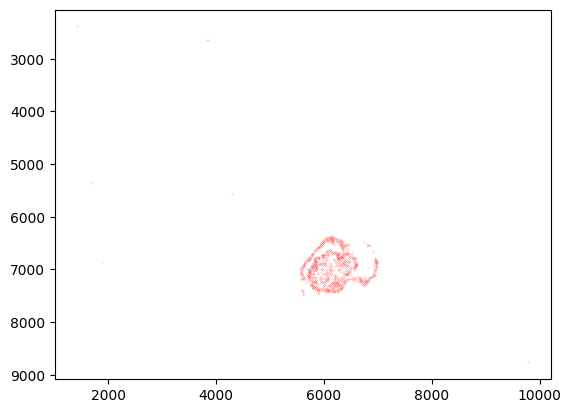

In [12]:
plt.scatter(df2['Centroid_x'], df2['Centroid_y'], s=0.01, c='r')
plt.gca().invert_yaxis()

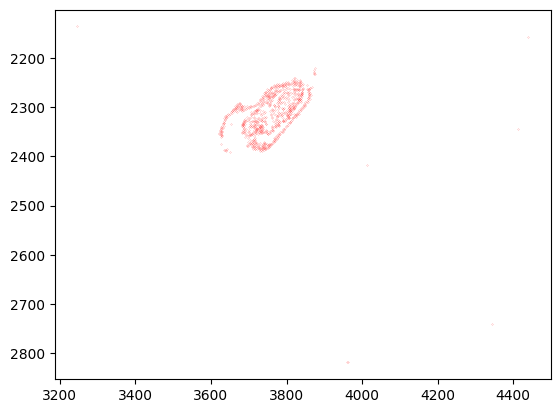

In [13]:
plt.scatter(reg_coord[:,0], reg_coord[:,1], s=0.01, c='r')
plt.gca().invert_yaxis()

In [14]:
from scipy.io import savemat

outpth = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\volcell_coords_with_features'

# savemat(outpth, {'x_y_area':Cy5_output})

In [15]:
df2.columns.tolist()

['Centroid_x',
 'Centroid_y',
 'Area',
 'Perimeter',
 'Circularity',
 'Aspect Ratio',
 'compactness',
 'eccentricity',
 'extent',
 'form_factor',
 'maximum_radius',
 'mean_radius',
 'median_radius',
 'minor_axis_length',
 'orientation_degrees',
 'r_mean_intensity',
 'g_mean_intensity',
 'b_mean_intensity']

In [16]:
for ind in range(len(pth_registered_list)):
    nm = "".join(["monkey_fetus_40_", pth_registered_list[ind].split('\\')[-1].split('.')[0][-4:], ".mat"])  # gets name of file for monkey fetus
    outnm = rf'{outpth}\{nm}'
    print(nm)
    
    if not os.path.exists(outnm):
    
        reg_coord = load_var_from_mat(pth_registered_list[ind], 'xye')
        inds = np.transpose(load_var_from_mat(pth_indices_list[ind], 'inds'))
        
        if len(reg_coord) != len(inds):
            print(f'SKIPPING {nm}')
            continue
        
        with open(pth_pickle_list_2[ind], 'rb') as f:
            df = pickle.load(f)
            
        df2 = df.iloc[inds.flatten()]
        df2.insert(0, 'reg_cent_y_5x_cropped', reg_coord[:,1])
        df2.insert(0, 'reg_cent_x_5x_cropped', reg_coord[:,0])

        savemat(outnm, {'df':df2, 'colnames': df2.columns.tolist()})
    
        #break
        
        # fig, ax = plt.subplots(1,2, figsize=(20,5))
        # df3 = df2[df2['Area'] > 300]
        # ax[0].scatter(df3['Centroid_x'], df3['Centroid_y'], s=0.1, c='r')
        # ax[0].invert_yaxis()
        # 
        # ax[1].scatter(df3['reg_cent_x_2_5x_cropped'], df3['reg_cent_y_2_5x_cropped'], s=0.1, c='b')
        # ax[1].invert_yaxis()

monkey_fetus_40_0001.mat
monkey_fetus_40_0002.mat
monkey_fetus_40_0003.mat
monkey_fetus_40_0004.mat
monkey_fetus_40_0005.mat
monkey_fetus_40_0006.mat
monkey_fetus_40_0007.mat
monkey_fetus_40_0008.mat
monkey_fetus_40_0009.mat
monkey_fetus_40_0010.mat
monkey_fetus_40_0011.mat
monkey_fetus_40_0012.mat
monkey_fetus_40_0013.mat
monkey_fetus_40_0014.mat
monkey_fetus_40_0015.mat
monkey_fetus_40_0016.mat
monkey_fetus_40_0017.mat
monkey_fetus_40_0018.mat
monkey_fetus_40_0019.mat
monkey_fetus_40_0020.mat
monkey_fetus_40_0021.mat
monkey_fetus_40_0023.mat
monkey_fetus_40_0024.mat
monkey_fetus_40_0025.mat
monkey_fetus_40_0026.mat
monkey_fetus_40_0027.mat
monkey_fetus_40_0028.mat
monkey_fetus_40_0029.mat
monkey_fetus_40_0030.mat
monkey_fetus_40_0031.mat
monkey_fetus_40_0032.mat
monkey_fetus_40_0033.mat
monkey_fetus_40_0034.mat
monkey_fetus_40_0035.mat
monkey_fetus_40_0036.mat
monkey_fetus_40_0037.mat
SKIPPING monkey_fetus_40_0037.mat
monkey_fetus_40_0038.mat
monkey_fetus_40_0039.mat
monkey_fetus_40_

In [17]:
outnm

'\\\\10.162.80.16\\Andre_expansion\\data\\monkey_fetus\\Stardist\\StarDist_12_25_23\\volcell_coords_with_features\\monkey_fetus_40_1204.mat'

In [83]:
df2.head()

,reg_cent_x_5x_cropped,reg_cent_y_5x_cropped,Centroid_x,Centroid_y,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,extent,form_factor,maximum_radius,mean_radius,median_radius,minor_axis_length,orientation_degrees,r_mean_intensity,g_mean_intensity,b_mean_intensity
161,1474.056152,945.946045,26544.0,26368.0,116.06250,39.656250,0.926270,1.109375,13.562500,0.433594,0.765137,1.079102,8.085938,6.050781,5.828125,11.687500,2644.000,145.125,140.000,143.250
162,1492.262939,944.924866,26656.0,26368.0,37.09375,24.468750,0.778320,1.441406,16.140625,0.720215,0.749023,1.284180,4.996094,3.382812,3.212891,5.859375,6628.000,155.375,157.250,159.125
164,1492.253052,946.576660,26656.0,26384.0,49.37500,27.078125,0.846191,1.336914,14.851562,0.663574,0.762207,1.181641,5.500000,3.894531,3.853516,6.960938,139.875,140.250,138.750,145.000
165,1494.203735,943.069031,26672.0,26352.0,114.56250,41.031250,0.854980,1.791016,14.695312,0.829590,0.766602,1.169922,8.218750,5.898438,5.714844,9.132812,5036.000,142.625,139.125,140.500
166,2830.413330,867.558228,36640.0,28704.0,129.37500,42.625000,0.895508,1.405273,14.031250,0.702637,0.756836,1.117188,9.437500,6.347656,6.062500,11.031250,9056.000,183.625,155.625,179.750


In [20]:
df.columns.tolist()

['Centroid_x',
 'Centroid_y',
 'Area',
 'Perimeter',
 'Circularity',
 'Aspect Ratio',
 'compactness',
 'eccentricity',
 'extent',
 'form_factor',
 'maximum_radius',
 'mean_radius',
 'median_radius',
 'minor_axis_length',
 'orientation_degrees',
 'r_mean_intensity',
 'g_mean_intensity',
 'b_mean_intensity']

In [88]:
inds

array([[  161],
       [  162],
       [  164],
       ...,
       [11825],
       [11826],
       [11832]])

In [84]:
df3 = df2 # df2[df2['Area'] > 300]

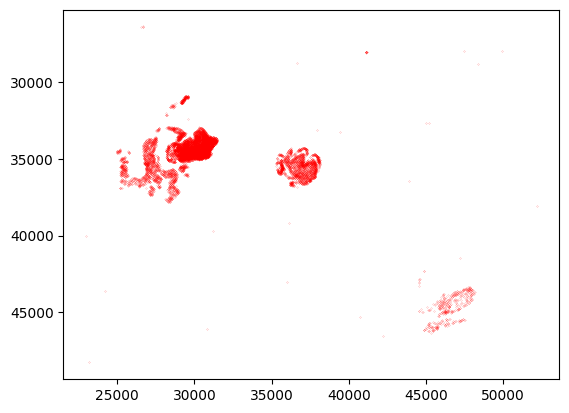

In [85]:
plt.scatter(df3['Centroid_x'], df3['Centroid_y'], s=0.01, c='r')
plt.gca().invert_yaxis()

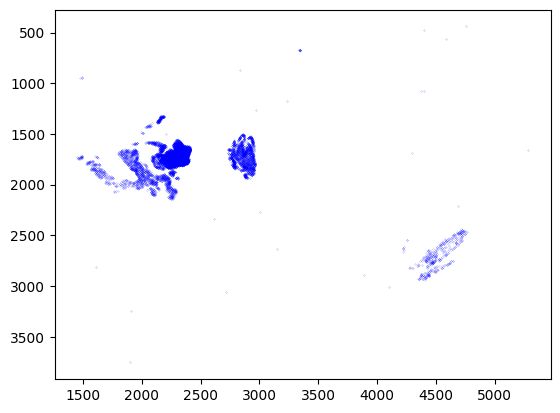

In [86]:
plt.scatter(df3['reg_cent_x_5x_cropped'], df3['reg_cent_y_5x_cropped'], s=0.01, c='b')
plt.gca().invert_yaxis()